In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import StratifiedKFold
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
from numpy import interp
df = pd.read_csv("Data\\2019Custom\\2019_JUNE_SEA_GameStats.csv", header=None)
df

In [50]:
df_sort = df.sort_values(by=[3])
df_sort[:14]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
9,LAA,SEA,9,0,31,34,27,41,0.476923077,1,0.266111111,0.363222222,0.466888889,4.35,0.397058824,-1,0.232777778,0.317222222,0.444555556,5.31
1,SEA,LAA,1,0,25,35,28,30,0.416666667,1,0.2436,0.3203,0.4364,3.6,0.482758621,-1,0.290888889,0.374111111,0.506777778,4.09
2,SEA,LAA,2,0,25,36,29,30,0.409836066,-1,0.223090909,0.305545455,0.399909091,4.89,0.491525424,1,0.286,0.383272727,0.472909091,4.76
3,SEA,HOU,3,0,25,37,40,20,0.403225806,-2,0.236777778,0.332666667,0.425111111,4.24,0.666666667,3,0.246777778,0.319888889,0.402888889,5.59
4,SEA,HOU,4,0,25,38,41,20,0.396825397,-3,0.219090909,0.302636364,0.393090909,7.71,0.672131148,4,0.257545455,0.329454545,0.419818182,3.39
17,SEA,KCR,18,0,31,45,24,48,0.407894737,-1,0.253,0.321,0.406727273,5.15,0.333333333,2,0.249,0.3086,0.4065,4.82
6,SEA,HOU,6,0,26,39,42,21,0.4,1,0.224909091,0.317454545,0.410181818,3.1,0.666666667,-1,0.25025,0.317916667,0.41825,2.31
7,LAA,SEA,7,0,30,33,26,40,0.476190476,-1,0.2484,0.3763,0.4305,5.4,0.393939394,-1,0.228444444,0.315555556,0.422444444,4.77
16,SEA,KCR,17,0,31,44,23,48,0.413333333,1,0.25775,0.3255,0.420083333,3.03,0.323943662,1,0.2497,0.3062,0.4042,4.64
21,SEA,BAL,22,0,34,46,21,55,0.425,3,0.2544,0.3232,0.4084,3.35,0.276315789,-10,0.2475,0.3041,0.4055,4.37


In [77]:
X = df.loc[1:,8:].values
y = df.loc[1:,3:3].values.ravel()

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
scaler = StandardScaler()
X_transform = scaler.fit_transform(X)
le = LabelEncoder()
y_label = le.fit_transform(y)

In [56]:
from numpy import array
from numpy import mean
from numpy import cov
from numpy.linalg import eig
# define a matrix
A = array(X_transform)

# calculate the mean of each column
M = mean(A.T, axis=1)

# center columns by subtracting column means
C = A - M

# calculate covariance matrix of centered matrix. This is how much each columns varies with other columns
V = cov(C.T)

# eigendecomposition of covariance matrix.  The larger the eigenvalue, the more it matters
values, vectors = eig(V)
print(f'Eigenvalues: {values}')

# project data using the covariance matrix and the eigenvectors
P = vectors.T.dot(C.T)

xval = [item[0] for item in P.T]
yval = [item[1] for item in P.T]
yval2 = [item[2] for item in P.T]
yval3 = [item[3] for item in P.T]

Eigenvalues: [3.99603821 2.83259784 2.27209634 1.02309677 0.64306259 0.5522262
 0.5401468  0.01990729 0.21143903 0.16149381 0.09168282 0.10065674]


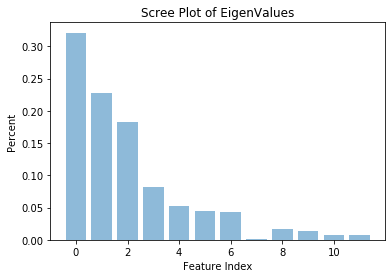

In [57]:
def create_scree(vector):
    total = sum(vector)
    percent = vector/total
    return percent

import matplotlib.pyplot as plt

plt.title('Scree Plot of EigenValues')
plt.ylabel('Percent')
plt.xlabel('Feature Index')
plt.bar([x for x in range(len(values))], create_scree(values), align='center', alpha=0.5)
plt.show()

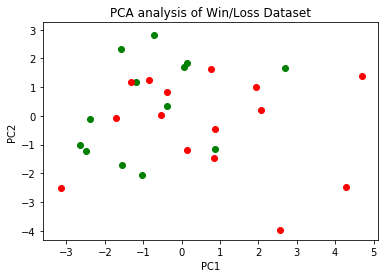

In [80]:
import matplotlib.pyplot as plt


for i,outcome in zip(list(range(len(y_label))),y_label):
    if outcome == 0:      
        plt.scatter(xval[i], yval[i], color='red')
    else:                            
        plt.scatter(xval[i], yval[i], color='green')

plt.title('PCA analysis of Win/Loss Dataset')
plt.xlabel('PC1')
plt.ylabel('PC2')

plt.show()

In [98]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = \
    train_test_split(X_transform, y_label, 
                     test_size=0.20,
                     stratify=y_label,
                     random_state=1)

In [99]:
from sklearn.pipeline import make_pipeline
pipe_lr_g = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))

In [104]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
    

kfold = StratifiedKFold(n_splits=3).split(X_train_g, y_train_g)

scores = []
#This is for demonstration purposes only: just use the  cross validation scorer below
for k, (train, test) in enumerate(kfold):
    pipe_lr_g.fit(X_train_g[train], y_train_g[train])
    score = pipe_lr_g.score(X_train_g[test], y_train_g[test])
    scores.append(score)
    print('Fold: %2d, Class dist.: %s, Acc: %.3f' % (k+1,
          np.bincount(y_train_g[train]), score))
    
print('\nCV accuracy: %.3f +/- %.3f' % (np.mean(scores), np.std(scores)))

Fold:  1, Class dist.: [8 6], Acc: 0.500
Fold:  2, Class dist.: [8 7], Acc: 0.714
Fold:  3, Class dist.: [8 7], Acc: 0.714

CV accuracy: 0.643 +/- 0.101


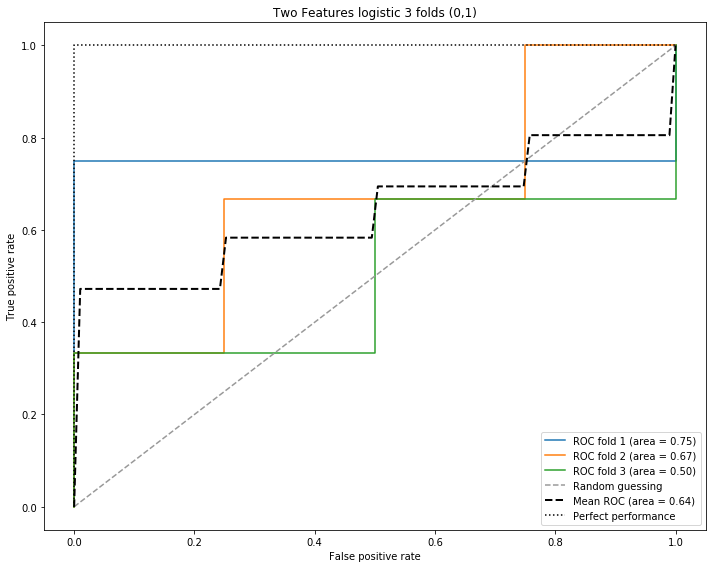

In [106]:
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        LogisticRegression(penalty='l2', 
                                           random_state=1,
                                           solver='lbfgs',
                                           C=100.0))
"""
pipe_lr = make_pipeline(StandardScaler(),
                        PCA(n_components=2),
                        MLPClassifier(activation = "logistic", 
                                      solver='sgd',
                                      learning_rate_init = 0.1,
                                      learning_rate = "constant",
                                      momentum = 0.1,
                                      max_iter = 10000))"""
                    
# here we are selecting only 2 features from the dataset
X_train2 = X_train[:, [0,1]]
    
#You can set the cross validator here with the number of splits
cv = list(StratifiedKFold(n_splits=3).split(X_train, y_train))

fig = plt.figure(figsize=(10, 8))

mean_tpr = 0.0
mean_fpr = np.linspace(0, 1, 100)
all_tpr = []

for i, (train, test) in enumerate(cv):
    #Xtrain2 is used here for the fit, using only the features chosen above.  If you use the Xtrain data it will get 100%
    probas = pipe_lr.fit(X_train2[train],
                         y_train[train]).predict_proba(X_train2[test])

    fpr, tpr, thresholds = roc_curve(y_train[test],
                                     probas[:, 1],
                                     pos_label=1)
    mean_tpr += interp(mean_fpr, fpr, tpr)
    mean_tpr[0] = 0.0
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr,
             tpr,
             label='ROC fold %d (area = %0.2f)'
                   % (i+1, roc_auc))
plt.plot([0, 1],
         [0, 1],
         linestyle='--',
         color=(0.6, 0.6, 0.6),
         label='Random guessing')

mean_tpr /= len(cv)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
plt.plot(mean_fpr, mean_tpr, 'k--',
         label='Mean ROC (area = %0.2f)' % mean_auc, lw=2)
plt.plot([0, 0, 1],
         [0, 1, 1],
         linestyle=':',
         color='black',
         label='Perfect performance')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.title("Two Features logistic 3 folds (0,1)")
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.legend(loc="lower right")

plt.tight_layout()
#plt.savefig('2_features_3folds.png', dpi=300)
plt.show()